## Extract depth and color frames from bag file

In [8]:
from BagReader import BagFileReader
import matplotlib.pyplot as plt
import pyrealsense2 as rs
import imageio
import os
import cv2
import shutil

In [2]:
try:
    os.makedirs("preprocess/real")
    print("dir real created")
except FileExistsError:
    print("dir real exists")

dir real exists


In [3]:
PATH_REAL = "SUN/real"
PATH_SAVE = "preprocess/real"

In [4]:
fileNames = []
for dirpath, dirnames, filenames in os.walk(PATH_REAL):
    fileNames.append(filenames)

In [5]:
# for filename in fileNames[0]:
#     print(filename)

In [6]:
# data = BagFileReader(f"{PATH_REAL}/{fileNames[0][0]}", 848, 480, 848, 480, 30, 30)

In [7]:
for filename in fileNames[0]:
    i = 0
    
    folder_name = filename.split("_")[-1].split(".")[0]
    data = BagFileReader(f"{PATH_REAL}/{filename}", 848, 480, 848, 480, 30, 30)
    
    os.makedirs(f"{PATH_SAVE}/{folder_name}/color")
    os.makedirs(f"{PATH_SAVE}/{folder_name}/depth")
    while True:
        try:
            color = data.get_color_frame()
            depth = data.get_depth_frame()
            color_image = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
            depth_image = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.03), cv2.COLORMAP_JET)

            cv2.imwrite(f"{PATH_SAVE}/{folder_name}/color/{i}.png", color_image)
            cv2.imwrite(f"{PATH_SAVE}/{folder_name}/depth/{i}.png", depth_image)

            i = i+1
        except:
            break

Getting from bag file SUN/real/20211108_115353_tuan.bag
Getting from bag file SUN/real/20211108_115810_tuan30.bag
Getting from bag file SUN/real/20211108_144234_vinh.bag
Getting from bag file SUN/real/20211108_145109_vinh30.bag
Getting from bag file SUN/real/20211108_145403_thanh.bag
Getting from bag file SUN/real/20211108_145547_thanh30.bag
Getting from bag file SUN/real/20211108_145752_dat.bag
Getting from bag file SUN/real/20211108_145925_dat30.bag
Getting from bag file SUN/real/20211108_152354_trung.bag
Getting from bag file SUN/real/20211108_152531_trung30.bag
Getting from bag file SUN/real/20211109_111458_tung.bag
Getting from bag file SUN/real/20211109_111632_tung30.bag
Getting from bag file SUN/real/20211109_112018_quang.bag
Getting from bag file SUN/real/20211109_112216_quang30.bag
Getting from bag file SUN/real/20211109_112546_hungdd.bag
Getting from bag file SUN/real/20211109_112741_dungdd30.bag
Getting from bag file SUN/real/20211109_113411_hieubhm.bag
Getting from bag file

## Align depth to color frame

In [2]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
colorPath = "preprocess/real/dat/color/900.png"
depthPath = "preprocess/real/dat/depth/900.png"

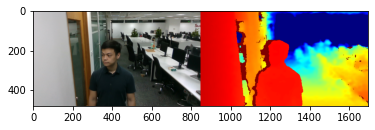

In [4]:
color = cv2.imread(colorPath)
depth = cv2.imread(depthPath)
color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
# depth = cv2.applyColorMap(cv2.convertScaleAbs(depth, alpha=0.03), cv2.COLORMAP_JET)
# plt.imshow(color)
# plt.imshow(depth)
images = np.hstack((color, depth))
plt.imshow(images)
plt.show()

In [7]:
def extractBagFile(pathToBag, pathToSave, ):